In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
temp_df1 = pd.read_csv("Bagdasarianz_daten/tas_yearly_RCP2.6_CH_transient.csv")
temp_df2 = pd.read_csv("Bagdasarianz_daten/tas_yearly_RCP4.5_CH_transient.csv")
temp_df3 = pd.read_csv("Bagdasarianz_daten/tas_yearly_RCP8.5_CH_transient.csv")

temp_df1.head()

,tas,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,EUR-11_DMI-HIRHAM5_ICHEC-EC-EARTH_r3i1p1,4.261398,5.949986,5.353505,4.178893,5.180275,4.821428,5.271947,5.702973,6.544580,...,5.574879,7.079006,6.262468,5.818835,6.694671,5.979617,6.383185,7.042538,6.943534,6.324651
1,EUR-44_KNMI-RACMO22E_MOHC-HadGEM2-ES_r1i1p1,4.816937,5.839683,4.553040,4.919456,5.368288,5.917329,5.035802,5.364179,5.818758,...,7.936913,5.730242,7.524796,7.042962,6.394351,6.890583,6.680558,5.620293,6.982734,7.664764
2,EUR-11_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_r2i1p1,5.784048,5.396191,4.872943,6.015056,5.278483,4.081241,5.556449,5.595390,5.283402,...,6.655007,6.610099,6.956537,6.885620,5.682116,6.336233,5.684110,6.805847,6.557417,6.611201
3,EUR-11_SMHI-RCA4_ICHEC-EC-EARTH_r12i1p1,5.006466,5.292200,4.626370,4.908261,6.094484,5.223255,4.777223,4.436303,5.171082,...,5.837995,6.004139,6.802028,6.914165,7.366786,6.568554,7.193991,6.418227,6.945765,6.264725
4,EUR-44_SMHI-RCA4_MOHC-HadGEM2-ES_r1i1p1,4.170957,5.660131,4.902735,4.864161,5.587037,5.123185,5.097368,5.675083,4.729190,...,7.231718,6.524816,7.621234,7.308048,6.578599,6.933883,7.390264,6.124309,7.182206,6.363232


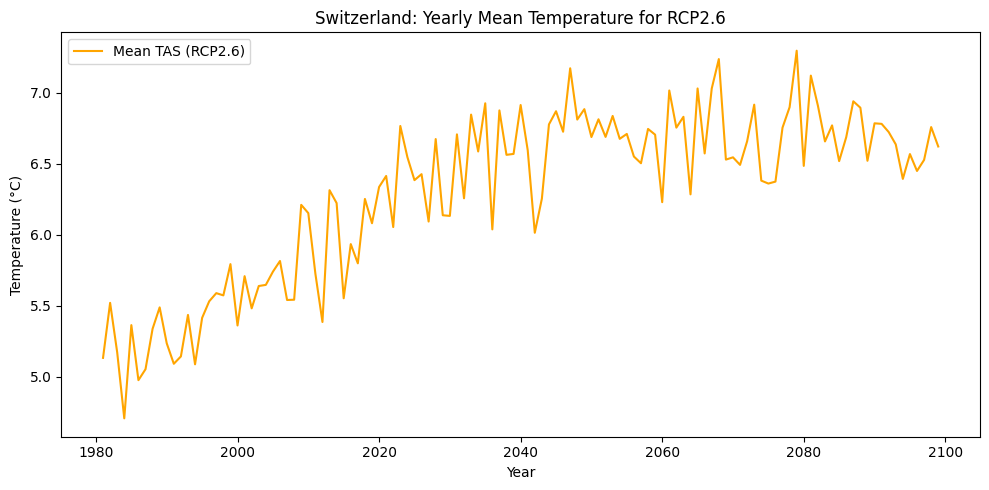

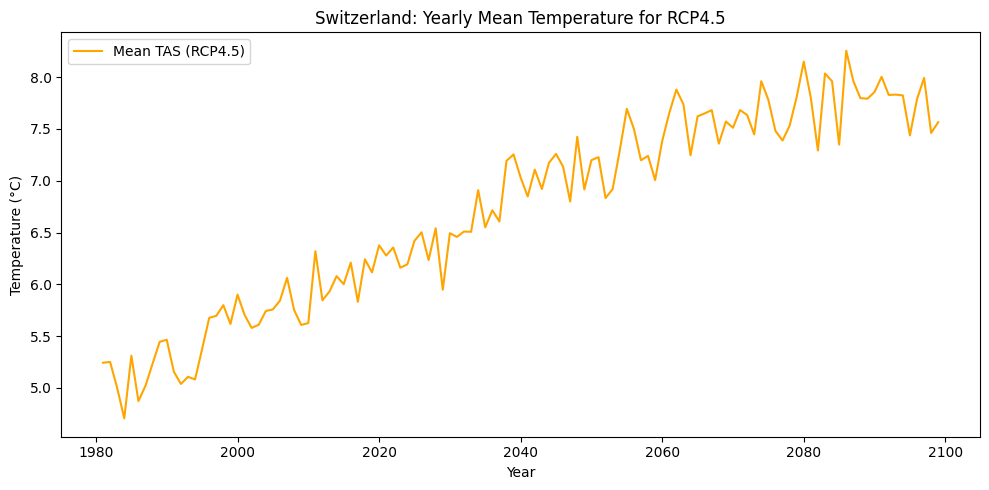

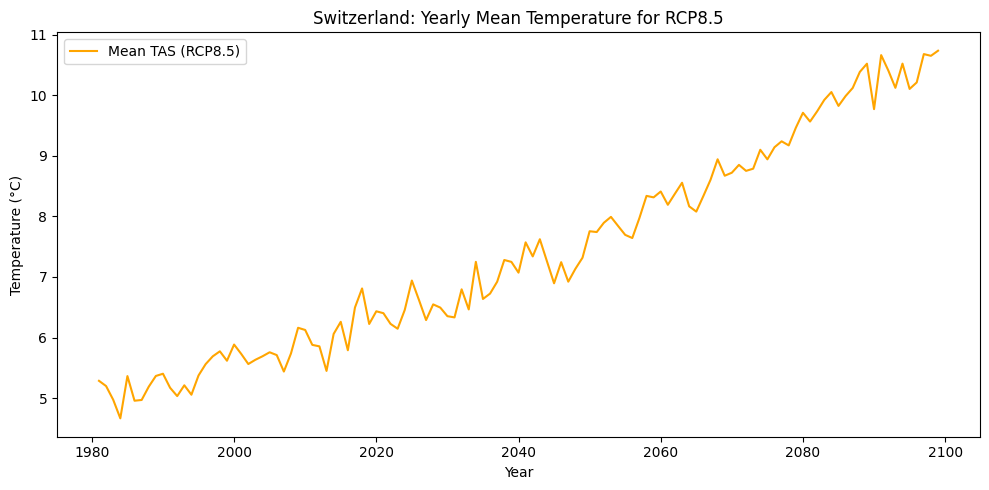

In [31]:
def plot(data, scenario):
    df = data.set_index('tas')
    df.head()

    # Transpose: years become rows
    df_transposed = df.T
    df_transposed.index = df_transposed.index.astype(int)

    # Calculate the mean temperature across all models per year
    df_transposed['mean_temp'] = df_transposed.mean(axis=1)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(df_transposed.index, df_transposed['mean_temp'], label=f'Mean TAS ({scenario})', color='orange')
    plt.title(f'Switzerland: Yearly Mean Temperature for {scenario}')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot(temp_df1, "RCP2.6")
plot(temp_df2, "RCP4.5")
plot(temp_df3, "RCP8.5")


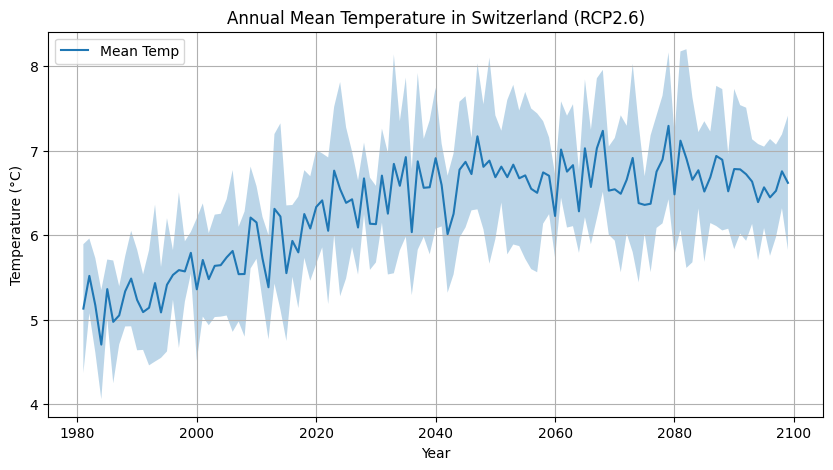

In [42]:
# === Load data ===
# Temperature (example for RCP2.6, repeat for RCP4.5/8.5 if needed)
temp = pd.read_csv("Bagdasarianz_daten/tas_yearly_RCP2.6_CH_transient.csv")
temp_data = temp.drop(columns='tas').astype(float)
years = np.array([int(y) for y in temp_data.columns])
mean_temp = temp_data.mean()
std_temp = temp_data.std()

# Bird data
birds = pd.read_csv("Voegeldaten/zugvögel.csv", encoding="latin1")  # Fix encoding
birds.columns = birds.columns.str.strip()  # Clean headers

# === 1. Temperature trend over time ===
def plot_temp_trend():
    plt.figure(figsize=(10, 5))
    plt.plot(years, mean_temp, label='Mean Temp')
    plt.fill_between(years, mean_temp - std_temp, mean_temp + std_temp, alpha=0.3)
    plt.title("Annual Mean Temperature in Switzerland (RCP2.6)")
    plt.xlabel("Year")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_temp_trend()

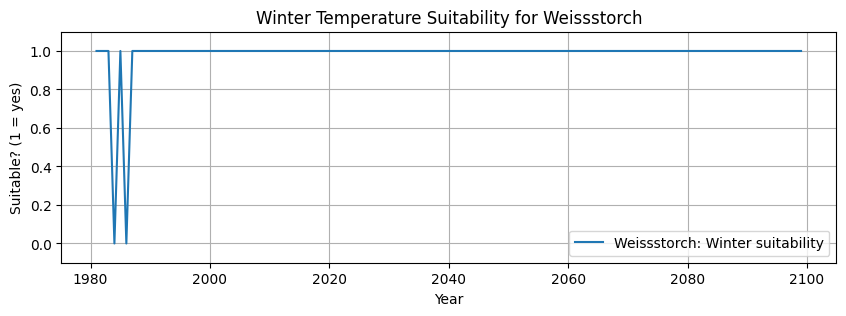

In [44]:
# === 2. Winter suitability for bird species over time ===
def plot_bird_winter_suitability(bird_name):
    bird = birds[birds['Artname'].str.contains(bird_name, case=False, na=False)].iloc[0]
    low = float(bird['avg_comf_temp_low'])
    high = float(bird['avg_comf_temp_high'])

    suitability = ((mean_temp >= low) & (mean_temp <= high)).astype(int)

    plt.figure(figsize=(10, 3))
    plt.plot(years, suitability, label=f"{bird_name}: Winter suitability")
    plt.title(f"Winter Temperature Suitability for {bird_name}")
    plt.xlabel("Year")
    plt.ylabel("Suitable? (1 = yes)")
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_bird_winter_suitability("Weissstorch")

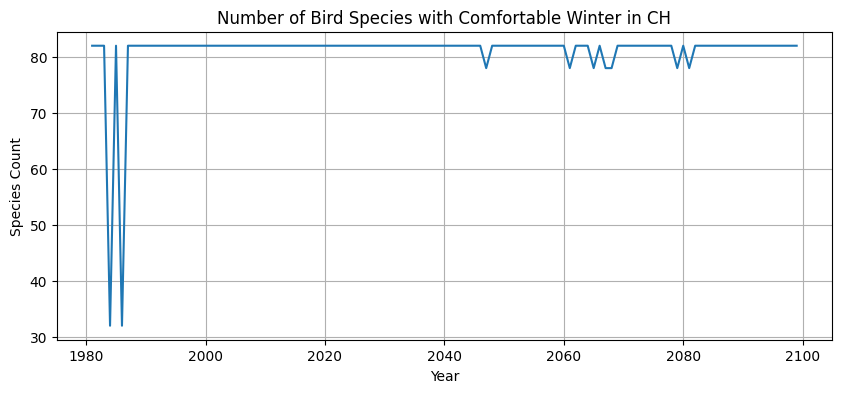

In [45]:

# === 3. Count how many bird species find CH winter comfortable ===
def plot_species_comfort_count():
    count_per_year = []
    for year in years:
        count = 0
        for _, bird in birds.iterrows():
            low = float(bird['avg_comf_temp_low'])
            high = float(bird['avg_comf_temp_high'])
            if low <= mean_temp[str(year)] <= high:
                count += 1
        count_per_year.append(count)

    plt.figure(figsize=(10, 4))
    plt.plot(years, count_per_year)
    plt.title("Number of Bird Species with Comfortable Winter in CH")
    plt.xlabel("Year")
    plt.ylabel("Species Count")
    plt.grid(True)
    plt.show()
plot_species_comfort_count()

/var/folders/k9/q97znt95701gnqkcktr5tsfw0000gn/T/ipykernel_71152/2748636038.py:21: UserWarning:

Glyph 138 (\x8a) missing from font(s) DejaVu Sans.

/var/folders/k9/q97znt95701gnqkcktr5tsfw0000gn/T/ipykernel_71152/2748636038.py:21: UserWarning:

Glyph 159 (\x9f) missing from font(s) DejaVu Sans.

/var/folders/k9/q97znt95701gnqkcktr5tsfw0000gn/T/ipykernel_71152/2748636038.py:21: UserWarning:

Glyph 154 (\x9a) missing from font(s) DejaVu Sans.

/Users/loading.../Documents/GitHub/CDK1_Klimadaten_Challenge_FHNW/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 138 (\x8a) missing from font(s) DejaVu Sans.

/Users/loading.../Documents/GitHub/CDK1_Klimadaten_Challenge_FHNW/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 159 (\x9f) missing from font(s) DejaVu Sans.

/Users/loading.../Documents/GitHub/CDK1_Klimadaten_Challenge_FHNW/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 154 (

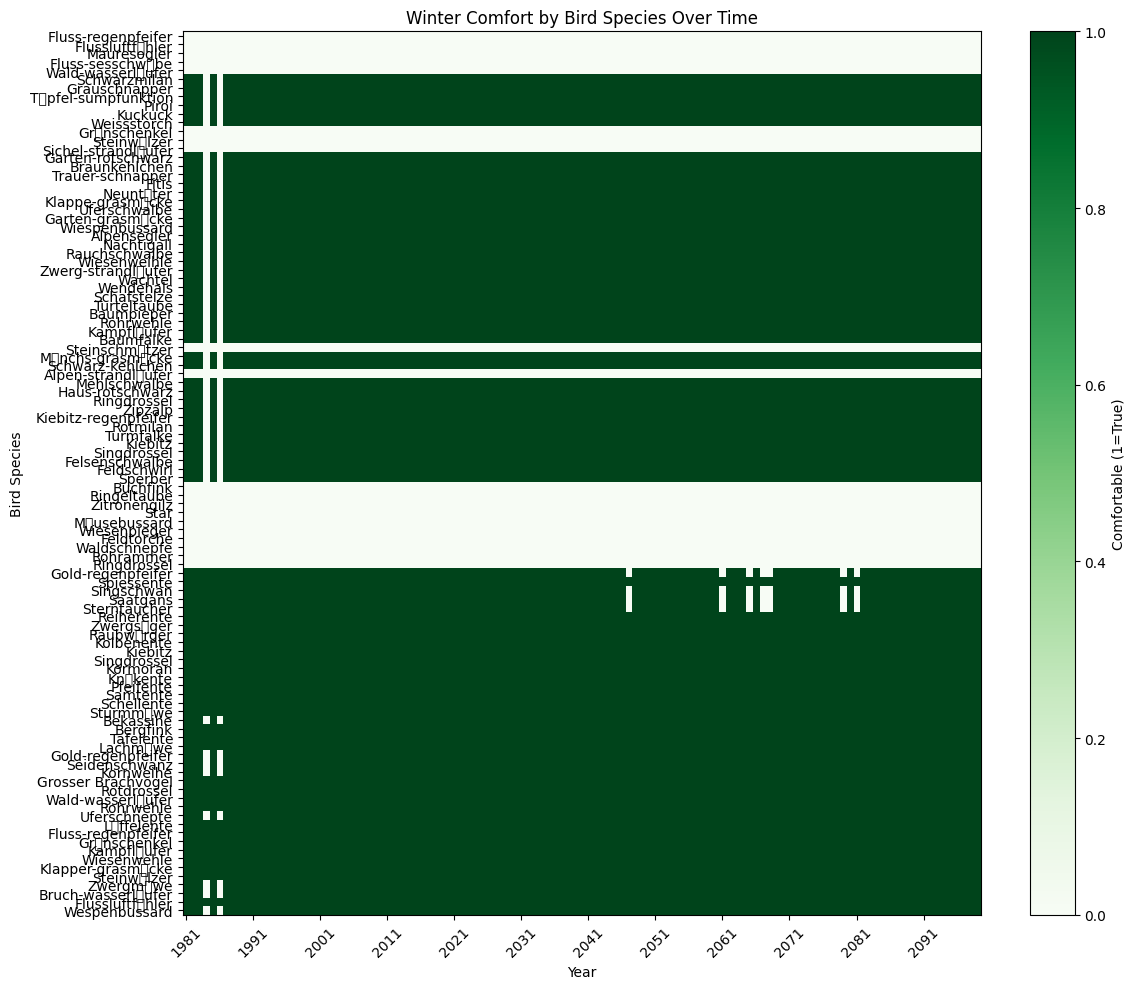

In [46]:

# === 4. Heatmap: Bird species vs. winter comfort across decades ===
def plot_species_heatmap():
    comfort_matrix = []
    species = []
    for _, bird in birds.iterrows():
        low = float(bird['avg_comf_temp_low'])
        high = float(bird['avg_comf_temp_high'])
        suitability = [(low <= mean_temp[str(y)] <= high) for y in years]
        comfort_matrix.append(suitability)
        species.append(bird['Artname'])

    comfort_matrix = np.array(comfort_matrix)
    plt.figure(figsize=(12, 10))
    plt.imshow(comfort_matrix, aspect='auto', cmap='Greens', interpolation='nearest')
    plt.colorbar(label='Comfortable (1=True)')
    plt.yticks(np.arange(len(species)), species)
    plt.xticks(np.arange(0, len(years), 10), years[::10], rotation=45)
    plt.title("Winter Comfort by Bird Species Over Time")
    plt.xlabel("Year")
    plt.ylabel("Bird Species")
    plt.tight_layout()
    plt.show()

plot_species_heatmap()

